# Using more sophisticated images with Convolutional Neural Networks

I실생활의 이미지는 모양도 다르고, 비율도 다르고, 색깔도 다양하다. 이러한 것들을 분류하는 CNN을 만들어 본다.


1.   Cats and Dogs 이미지 이용
2.   개와 고양이 분류하는 Neural Network 만들기
3.   Evaluate the Training and Validation accuracy

## Explore the Example Data

 `/tmp` 컬럼에, 2000개의 이미지를 다운로드 받아서 저장한다.

**NOTE:**  2,000 개의 이미지는 캐글에서 가져왔다. ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) 원래는  25,000 개의 이미지 이지만, 실습용으로 추렸음.

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-26 03:30:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.15.80, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   155MB/s    in 0.4s    

2021-02-26 03:30:41 (155 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### 압축 풀기

In [ ]:
!unzip /tmp/cats_and_dogs_filtered.zip -d /tmp/

In [ ]:
Y

### 데이터 억세스할 경로를 만든다.

In [3]:
import os

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
# path.join(경로1, 경로2) 해주면 / 슬래쉬로 구분해서 저장할 수 있음
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
validation_dir

'/tmp/cats_and_dogs_filtered/validation'

### 파일명을 찍어본다.

In [ ]:
os.listdir( train_dogs_dir)

In [12]:
os.listdir( validation_dogs_dir)

500

### 트레이닝 이미지와 밸리데이션 이미지를, 각각 몇개씩인지 확인해 본다.

In [6]:
len(os.listdir( train_cats_dir))

1000

In [15]:
len(os.listdir( train_dogs_dir))

1000

In [7]:
len(os.listdir( validation_cats_dir))

500

In [13]:
len(os.listdir( validation_dogs_dir))

500

개와 고양이 8개씩 화면에 이미지 표시해보자

In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [9]:
train_cat_fnames = os.listdir( train_cats_dir)
train_dog_fnames = os.listdir( train_dogs_dir)


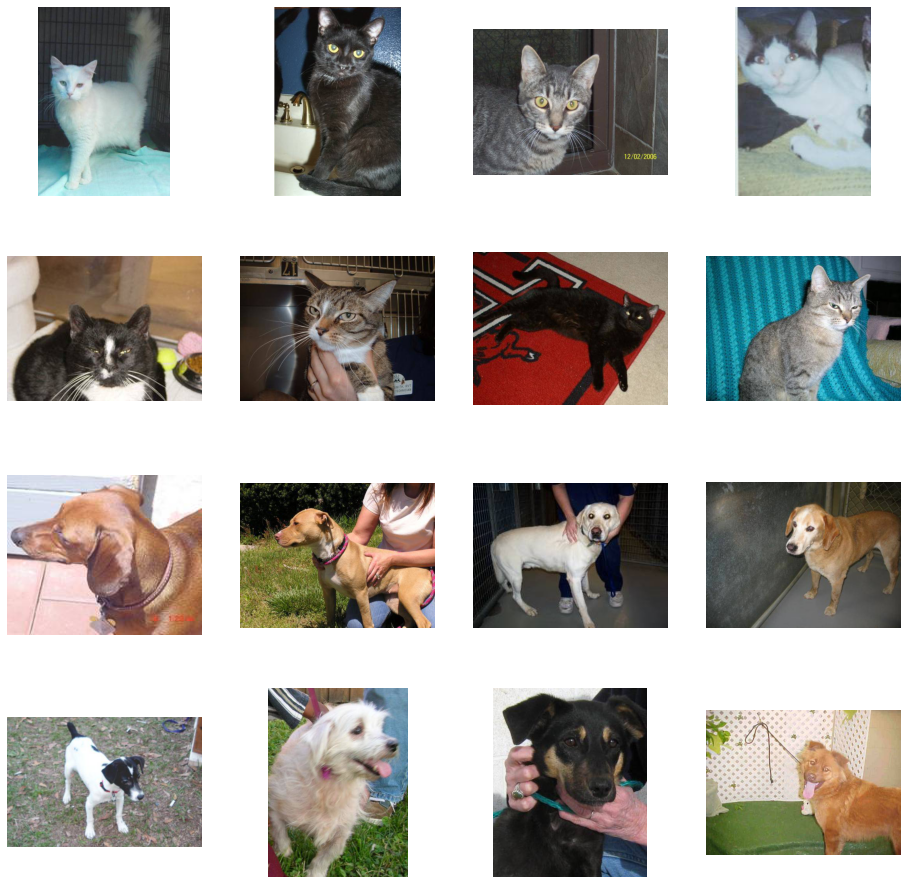

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch to Get to ~72% Accuracy

이미지의 사이즈를 150x150, 칼라(rgb) 로 처리하자.


In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
# 이미지 사이즈가 다 다름

In [ ]:
# 1. 커널 16개, 커널 사이즈 3x3
# 2. 맥스 풀링 2x2
# 3. 커널 32개, 커널 사이즈 3,3
# 4. 맥스 풀링 2,2
# 5. 커널 64개, 커널 사이즈 3,3
# 6. 맥스플링 2,2
# 7. DNN을 붙인다. 첫번째 DNN 512개
# 8. 아웃풋 레이어 붙인다

In [13]:
c_d_model = Sequential( [
  # CNN 하기 , input_shape=(150, 150, 3) 칼러
  Conv2D(filters= 16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3) ),
  MaxPooling2D(2, 2),
  Conv2D(filters= 32, kernel_size=(3,3), activation='relu' ),
  MaxPooling2D(2, 2),
  Conv2D(filters= 64, kernel_size=(3,3), activation='relu' ),
  MaxPooling2D(2, 2),
  # DNN 하기
  Flatten(),
  Dense(units=512, activation='relu'),
  Dense(units=1, activation='sigmoid') 
  ]
)

서머리 해보자

In [14]:
c_d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

### RMSprop 으로 컴파일한다.

In [15]:
from tensorflow.keras.optimizers import RMSprop

In [16]:
c_d_model.compile(optimizer= RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


### Data Preprocessing

ImageDataGenerator 사용하기

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
train_generator = train_datagen.flow_from_directory(
  train_dir, 
  target_size= (150, 150),
  class_mode='binary',
  batch_size = 20
)

Found 2000 images belonging to 2 classes.


In [20]:
validation_dir

'/tmp/cats_and_dogs_filtered/validation'

In [21]:
validation__datagen = ImageDataGenerator(rescale = 1 / 255.0)
validation_generator = validation__datagen.flow_from_directory(
  validation_dir, 
  target_size= (150, 150),
  class_mode='binary',  
  batch_size = 20
)

Found 1000 images belonging to 2 classes.


### Training
15 epochs 로 학습해 보자.


In [59]:
epoch_history = model.fit(train_generator, epochs=15, steps_per_epoch=8, \
                              validation_steps=50, validation_data=validation_generator, verbose=1)

Epoch 1/15
8/8 [==============================] - 4s 474ms/step - loss: 2.2876 - accuracy: 0.4040 - val_loss: 0.6895 - val_accuracy: 0.5580
Epoch 2/15
8/8 [==============================] - 3s 434ms/step - loss: 0.7051 - accuracy: 0.3980 - val_loss: 0.6811 - val_accuracy: 0.6170
Epoch 3/15
8/8 [==============================] - 3s 431ms/step - loss: 0.6961 - accuracy: 0.5115 - val_loss: 0.6785 - val_accuracy: 0.5970
Epoch 4/15
8/8 [==============================] - 3s 434ms/step - loss: 0.6974 - accuracy: 0.5297 - val_loss: 0.6862 - val_accuracy: 0.6170
Epoch 5/15
8/8 [==============================] - 3s 436ms/step - loss: 0.6755 - accuracy: 0.6567 - val_loss: 0.6740 - val_accuracy: 0.6460
Epoch 6/15
8/8 [==============================] - 3s 427ms/step - loss: 0.6962 - accuracy: 0.6854 - val_loss: 0.6691 - val_accuracy: 0.5490
Epoch 7/15
8/8 [==============================] - 3s 431ms/step - loss: 0.6720 - accuracy: 0.6212 - val_loss: 0.6814 - val_accuracy: 0.6000
Epoch 8/15
8/8 [====

###Running the Model

픽사베이에서 무료 사진 다운로드 받아서, 실제로 예측해 보자

In [66]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = c_d_model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving cat-2068462_640.jpg to cat-2068462_640.jpg
Saving tiger-3264048_640.jpg to tiger-3264048_640.jpg
Saving cat-1192026_640.jpg to cat-1192026_640.jpg
Saving cat-114782_640.jpg to cat-114782_640 (2).jpg
Saving cat-694730_640.jpg to cat-694730_640 (1).jpg
Saving rottweiler-1785760_640.jpg to rottweiler-1785760_640.jpg
Saving husky-3380548_640.jpg to husky-3380548_640 (1).jpg
Saving dog-3277416_640.jpg to dog-3277416_640.jpg
Saving puppy-1903313_640.jpg to puppy-1903313_640.jpg
Saving pug-690566_640.jpg to pug-690566_640 (1).jpg
[1.]
cat-2068462_640.jpg is a dog
[4.2392794e-11]
tiger-3264048_640.jpg is a dog
[1.]
cat-1192026_640.jpg is a dog
[1.]
cat-114782_640.jpg is a dog
[1.]
cat-694730_640.jpg is a dog
[1.]
rottweiler-1785760_640.jpg is a dog
[1.]
husky-3380548_640.jpg is a dog
[1.]
dog-3277416_640.jpg is a dog
[1.]
puppy-1903313_640.jpg is a dog
[1.]
pug-690566_640.jpg is a dog


### Evaluating Accuracy and Loss for the Model

training/validation accuracy 와 loss 를 차트로 시각화 한다.

In [25]:
#model 학습으로 받은 리턴값
train_acc = epoch_history.history['accuracy']
val_acc = epoch_history.history['val_accuracy']

train_loss = epoch_history.history['loss']
val_loss = epoch_history.history['val_loss']

In [97]:
train_loss


[1.681216835975647,
 0.6970640420913696,
 0.6909869909286499,
 0.707584023475647,
 0.6772469282150269,
 0.7261326909065247,
 0.7049412727355957,
 0.6714860200881958,
 0.6692436933517456,
 0.6488572359085083,
 0.6120715141296387,
 0.6119988560676575,
 0.6856989860534668,
 0.5889219641685486,
 0.6180837154388428]

In [26]:
X = range( len(train_acc))

In [101]:
X

range(0, 15)

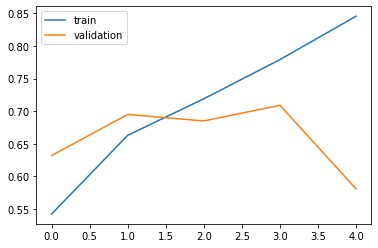

In [27]:
# train_정확도와 valiation_정확도 비교
plt.plot( X, train_acc)
plt.plot( X, val_acc)
plt.legend( ['train', 'validation'])
plt.show()

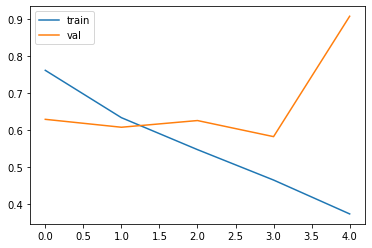

In [28]:
plt.plot( X, train_loss)
plt.plot( X, val_loss)
plt.legend( ['train', 'val'])
plt.show()

 **overfitting** 을 확인해 보자

In [ ]:
# 위의 accuracy와 val_accuracy와 loss 확인 한 후 다시 해볼 것
위의 모델링 다시 실행하고 올 것

In [22]:
epoch_history = c_d_model.fit(train_generator, epochs=5, steps_per_epoch=100, \
                              validation_steps=50, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 11s 85ms/step - loss: 0.9539 - accuracy: 0.5092 - val_loss: 0.6290 - val_accuracy: 0.6320
Epoch 2/5
100/100 [==============================] - 8s 84ms/step - loss: 0.6443 - accuracy: 0.6663 - val_loss: 0.6075 - val_accuracy: 0.6950
Epoch 3/5
100/100 [==============================] - 8s 83ms/step - loss: 0.5622 - accuracy: 0.7076 - val_loss: 0.6257 - val_accuracy: 0.6850
Epoch 4/5
100/100 [==============================] - 8s 83ms/step - loss: 0.4479 - accuracy: 0.7956 - val_loss: 0.5821 - val_accuracy: 0.7090
Epoch 5/5
100/100 [==============================] - 8s 84ms/step - loss: 0.3737 - accuracy: 0.8440 - val_loss: 0.9084 - val_accuracy: 0.5810
